In [1]:
import numpy as np
import cv2

# Section i

## (a) implement a convolution function using vanilla python

In [41]:
def generate_image_array(image):
    image_array = np.asarray(image, dtype='int32')
    alpha_col = np.full((image_array.shape[0], image_array.shape[1], 1), 255)
    img_array_reshaped = np.concatenate([image_array, alpha_col], axis=2)
    return img_array_reshaped


def generate_pixel_buffer(source_data_height, source_data_width, image_array):
    pixel_buffer = []
    for i in range(source_data_height):
        for j in range(source_data_width):
            for k in range(4):
                pixel_buffer.append(image_array[i, j, k])
    return pixel_buffer


In [26]:
class FilterBase:

    def __init__(self, name, factor, bias, value):
        self.name = name
        self.factor = factor
        self.bias = bias
        self.value = value
        self.width = len(value)
        self.height = len(value[0])
        self.offset = int((len(value)-1) / 2)


In [27]:
def apply_filter(source_data_height, source_data_width, img_array_source, filter_object):
    pixel_buffer = generate_pixel_buffer(source_data_height, source_data_width, img_array_source)
    result_buffer = []
    source_data_stride = source_data_width * 4

    for i in range(len(pixel_buffer)):
        result_buffer.append(0)

    for offsetY in range(filter_object.offset, source_data_height - filter_object.offset):
        for offsetX in range(filter_object.offset, source_data_width - filter_object.offset):

            blue = 0
            green = 0
            red = 0

            byte_offset = offsetY * source_data_stride + offsetX * 4

            for filterY in range(-filter_object.offset, filter_object.offset + 1):
                for filterX in range(-filter_object.offset, filter_object.offset + 1):
                    calc_offset = byte_offset + (filterX * 4) + (filterY * source_data_stride)

                    blue += pixel_buffer[calc_offset] * filter_object.value[filterY + filter_object.offset][
                        filterX + filter_object.offset]

                    green += pixel_buffer[calc_offset + 1] * filter_object.value[filterY + filter_object.offset][
                        filterX + filter_object.offset]

                    red += pixel_buffer[calc_offset + 2] * filter_object.value[filterY + filter_object.offset][
                        filterX + filter_object.offset]

            blue = filter_object.factor * blue + filter_object.bias
            green = filter_object.factor * green + filter_object.bias
            red = filter_object.factor * red + filter_object.bias

            if blue > 255:
                blue = 255
            elif blue < 0:
                blue = 0

            if green > 255:
                green = 255
            elif green < 0:
                green = 0

            if red > 255:
                red = 255
            elif red < 0:
                red = 0

            result_buffer[byte_offset] = blue
            result_buffer[byte_offset + 1] = green
            result_buffer[byte_offset + 2] = red
            result_buffer[byte_offset + 3] = 255

    return result_buffer

In [28]:
img = cv2.imread("WBB1.jpg")

edMatrix = [[0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0,  4,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0]]

edFilter = FilterBase("Vertical Edge Detection", 1, 0, edMatrix)

img_array = generate_image_array(img)
source_data_h = img_array.shape[0]
source_data_w = img_array.shape[1]

resultBuffer = apply_filter(source_data_h, source_data_w, img_array, edFilter)
img_proba_data = np.array(resultBuffer)
img_proba1 = img_proba_data.reshape(source_data_h, source_data_w, 4)

cv2.imwrite('filtered-image.jpg', img_proba1)

True

Original Image


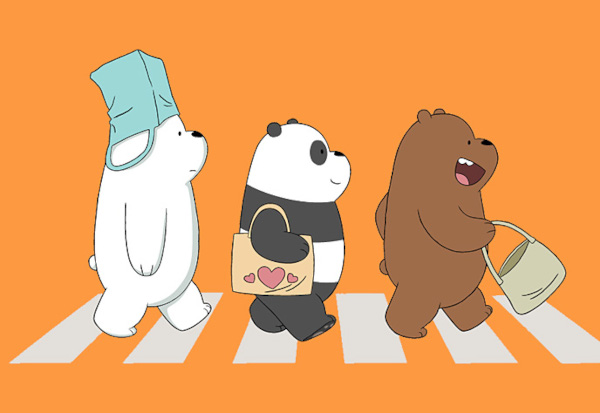

In [29]:
from IPython.display import Image
print("Original Image")
Image(filename='WBB1.jpg') 

Image with a filter applied


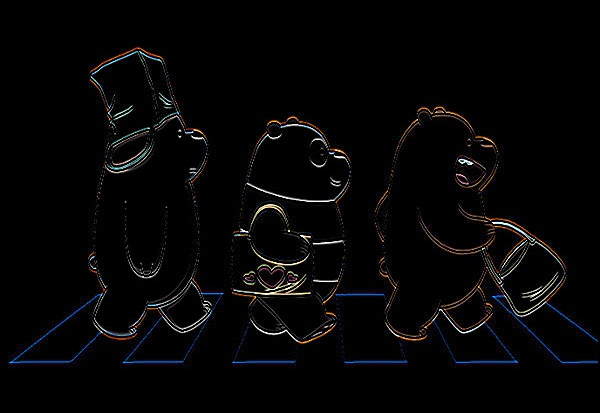

In [30]:
from IPython.display import Image
print("Image with a filter applied")
Image(filename='filtered-image.jpg') 

## (b) - Apply convolution to one image channel

In [31]:
import numpy as np
from PIL import Image
im = Image.open ('channel-image.jpg')
rgb = np.array(im.convert('RGB'))
r=rgb[:, :, 0]
#Image.fromarray(np.uint8(r)).show()
cv2.imwrite('red-filtered-image.jpg', r)

True

Image red channel


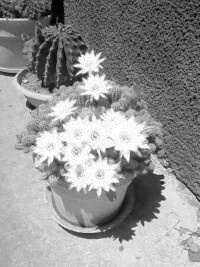

In [32]:
from IPython.display import Image
print("Image red channel")
Image(filename='red-filtered-image.jpg') 

In [43]:
def generate_pixel_buffer2(source_data_height, source_data_width, image_array):
    pixel_buffer = []
    for i in range(source_data_height):
        for j in range(source_data_width):
            pixel_buffer.append(image_array[i, j])
    return pixel_buffer


In [53]:
def apply_filter2(source_data_height, source_data_width, img_array_source, filter_object):
    pixel_buffer = generate_pixel_buffer(source_data_height, source_data_width, img_array_source)
    result_buffer = []

    for i in range(len(pixel_buffer)):
        result_buffer.append(0)

    for offsetY in range(filter_object.offset, source_data_height - filter_object.offset):
        for offsetX in range(filter_object.offset, source_data_width - filter_object.offset):

            red = 0

            byte_offset = offsetY * source_data_width  + offsetX

            for filterY in range(-filter_object.offset, filter_object.offset + 1):
                for filterX in range(-filter_object.offset, filter_object.offset + 1):
                    calc_offset = byte_offset + (filterX ) + (filterY * source_data_width)

                    red += pixel_buffer[calc_offset] * filter_object.value[filterY + filter_object.offset][
                        filterX + filter_object.offset]

            red = filter_object.factor * red + filter_object.bias

            if red > 255:
                red = 255
            elif red < 0:
                red = 0

            result_buffer[byte_offset] = red

    return result_buffer

In [54]:
img = cv2.imread("red-filtered-image.jpg")

kernel1 = [[-1,  -1, -1],
              [-1,  8, -1],
              [-1,  -1,  -1]]

filter1 = FilterBase("Filter 1", 1, 0, kernel1)

img_array = r
source_data_h = img_array.shape[0]
source_data_w = img_array.shape[1]

print(r.shape)
resultBuffer = apply_filter2(source_data_h, source_data_w, img_array, filter1)
img_proba_data = np.array(resultBuffer)
img_proba1 = img_proba_data.reshape(source_data_h, source_data_w)

cv2.imwrite('filtered-red-image.jpg', img_proba1)

(267, 200)


True

Image red channel


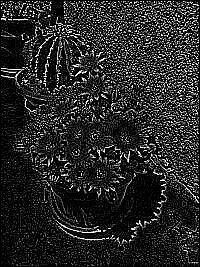

In [55]:
from IPython.display import Image
print("Image red channel")
Image(filename='filtered-red-image.jpg') 

In [56]:
img = cv2.imread("red-filtered-image.jpg")

kernel2 =   [[0,  -1, 0],
              [-1,  8, -1],
              [0,  -1,  0]]

filter2 = FilterBase("Filter 2", 1, 0, kernel2)

img_array = r
source_data_h = img_array.shape[0]
source_data_w = img_array.shape[1]

print(r.shape)
resultBuffer = apply_filter2(source_data_h, source_data_w, img_array, filter2)
img_proba_data = np.array(resultBuffer)
img_proba1 = img_proba_data.reshape(source_data_h, source_data_w)

cv2.imwrite('filtered-red-image2.jpg', img_proba1)

(267, 200)


True

Image red channel


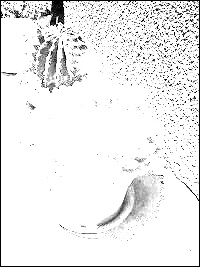

In [57]:
from IPython.display import Image
print("Image red channel")
Image(filename='filtered-red-image2.jpg') 

# Section ii

## (a) - inspect code

In [2]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)

INFO:tensorflow:Assets written to: cifar2.model\assets


INFO:tensorflow:Assets written to: cifar2.model\assets


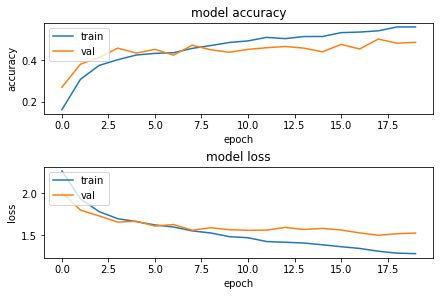

157/157 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       505
           1       0.83      0.56      0.67       460
           2       0.55      0.45      0.49       519
           3       0.49      0.45      0.47       486
           4       0.55      0.47      0.50       519
           5       0.45      0.74      0.56       488
           6       0.79      0.44      0.56       518
           7       0.68      0.62      0.65       486
           8       0.64      0.69      0.66       520
           9       0.62      0.76      0.68       498

    accuracy                           0.59      4999
   macro avg       0.61      0.59      0.58      4999
weighted avg       0.61      0.59      0.58      4999

[[358   6  17   5  10   9   1   9  70  20]
 [ 26 256   2   1   5  10   7   6  51  96]
 [ 63   5 232  37  51  62  16  22  16  15]
 [ 21   1  25 217  31 130  13  17   7  24]
 [ 41   0  70 

In [9]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
execution_time = 0
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start_time = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	execution_time = time.time() - start_time
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar2.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
print("--- %s seconds ---" % execution_time)

## (ii) model performance compare to a dumb classifier

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)
acc = accuracy_score(dummy_pred, y_test)
print(round(acc*100, 2), "%", sep="")

0.0%


In [7]:
import time

orig x_train shape: (9999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)

INFO:tensorflow:Assets written to: cifar2.model\assets


INFO:tensorflow:Assets written to: cifar2.model\assets


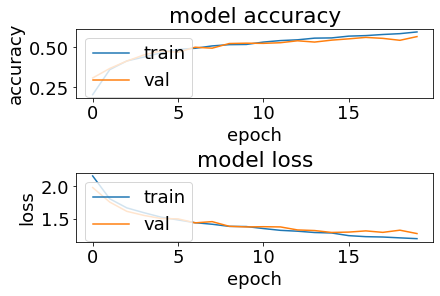

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      1005
           1       0.76      0.76      0.76       974
           2       0.63      0.41      0.50      1032
           3       0.52      0.52      0.52      1016
           4       0.52      0.52      0.52       999
           5       0.64      0.42      0.51       937
           6       0.59      0.78      0.67      1029
           7       0.65      0.74      0.69      1001
           8       0.75      0.70      0.72      1025
           9       0.59      0.83      0.69       981

    accuracy                           0.63      9999
   macro avg       0.63      0.63      0.62      9999
weighted avg       0.63      0.63      0.62      9999

[[622  40  48  19  25   6   9  20 119  97]
 [ 13 739   6   3   1   1  13   5  38 155]
 [ 61  14 423  84 168  40 124  64  23  31]
 [ 10  14  33 525  81 103 124  65  13  48]
 [ 29   9  61 

In [12]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=10000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
execution_time = 0
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start_time = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	execution_time = time.time() - start_time
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar2.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
print("--- %s seconds ---" % execution_time)

orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense

INFO:tensorflow:Assets written to: cifar3.model\assets


INFO:tensorflow:Assets written to: cifar3.model\assets


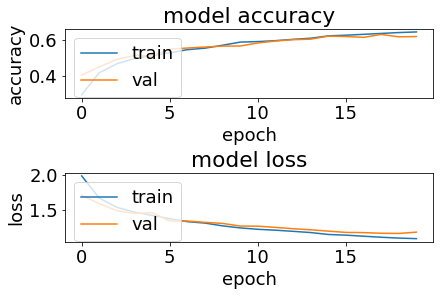

625/625 [==============================] - 4s 7ms/step
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1989
           1       0.79      0.85      0.82      1981
           2       0.65      0.50      0.57      2042
           3       0.67      0.38      0.48      2011
           4       0.60      0.59      0.60      2009
           5       0.64      0.57      0.60      1925
           6       0.55      0.89      0.68      2037
           7       0.73      0.77      0.75      2027
           8       0.80      0.79      0.80      2012
           9       0.76      0.78      0.77      1966

    accuracy                           0.69     19999
   macro avg       0.69      0.69      0.68     19999
weighted avg       0.69      0.69      0.68     19999

[[1500   54   62    7   49   22   31   33  161   70]
 [  34 1677    8    4    6    9   34   10   46  153]
 [ 141   18 1029   59  248  107  286   80   44   30]
 [  39   20  132  755  155 

In [13]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=20000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
execution_time = 0
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start_time = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	execution_time = time.time() - start_time
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar3.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
print("--- %s seconds ---" % execution_time)

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense

INFO:tensorflow:Assets written to: cifar3.model\assets


INFO:tensorflow:Assets written to: cifar3.model\assets


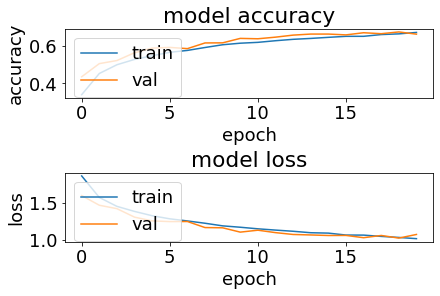

1250/1250 [==============================] - 7s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      3986
           1       0.86      0.81      0.83      3986
           2       0.58      0.60      0.59      4048
           3       0.52      0.55      0.53      3984
           4       0.66      0.63      0.64      4003
           5       0.61      0.65      0.63      3975
           6       0.59      0.89      0.71      4019
           7       0.82      0.70      0.75      4023
           8       0.87      0.77      0.82      3997
           9       0.82      0.79      0.80      3978

    accuracy                           0.70     39999
   macro avg       0.72      0.70      0.70     39999
weighted avg       0.72      0.70      0.70     39999

[[2424   71  471  182  115   71  139   68  268  177]
 [  60 3213   50   55   21   28  166   19   67  307]
 [  83    8 2449  288  361  259  480   77   27   16]
 [   9    7  264 2185  17

In [14]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=40000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
execution_time = 0
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start_time = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	execution_time = time.time() - start_time
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar3.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
print("--- %s seconds ---" % execution_time)

## modify the L1 parameter

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


INFO:tensorflow:Assets written to: cifar.model\assets


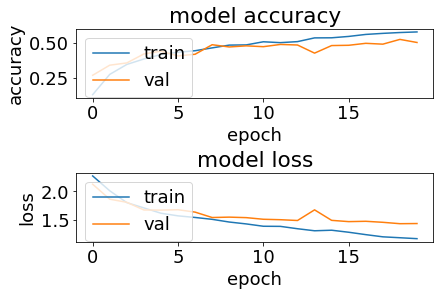

157/157 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       505
           1       0.79      0.67      0.72       460
           2       0.60      0.51      0.55       519
           3       0.58      0.49      0.53       486
           4       0.59      0.50      0.54       519
           5       0.53      0.69      0.60       488
           6       0.60      0.75      0.67       518
           7       0.66      0.67      0.67       486
           8       0.72      0.72      0.72       520
           9       0.72      0.71      0.71       498

    accuracy                           0.64      4999
   macro avg       0.64      0.64      0.64      4999
weighted avg       0.64      0.64      0.64      4999

[[347  11  23   7  14   6   7  14  55  21]
 [ 12 307   3   3  10   9  19   3  37  57]
 [ 31   4 263  30  55  52  45  31   5   3]
 [  5   1  29 236  24  94  58  23   4  12]
 [ 23   4  49 

In [15]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.000)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
    #aici initializam start_time
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    #aci calculam cat o durat
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
#aci punem printul cu timpu de executie

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


INFO:tensorflow:Assets written to: cifar.model\assets


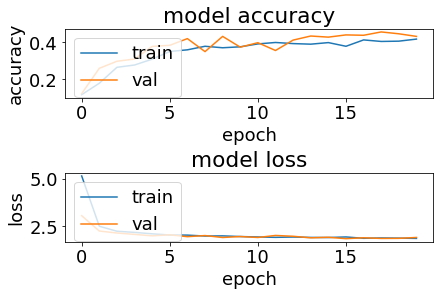

157/157 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.45      0.63      0.52       505
           1       0.67      0.43      0.52       460
           2       0.55      0.09      0.15       519
           3       0.35      0.26      0.30       486
           4       0.37      0.38      0.38       519
           5       0.57      0.17      0.26       488
           6       0.34      0.74      0.46       518
           7       0.37      0.65      0.47       486
           8       0.66      0.29      0.40       520
           9       0.49      0.67      0.57       498

    accuracy                           0.43      4999
   macro avg       0.48      0.43      0.40      4999
weighted avg       0.48      0.43      0.40      4999

[[317  26   2  16  17   3  10  54  26  34]
 [ 27 198   0   4   1   2  45  31  12 140]
 [ 61   1  46  47 136   9 116  82   7  14]
 [ 12   2   5 128  40  29 180  60   5  25]
 [ 33   2  12 

In [16]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.01)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
    #aici initializam start_time
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    #aci calculam cat o durat
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
#aci punem printul cu timpu de executie

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


INFO:tensorflow:Assets written to: cifar.model\assets


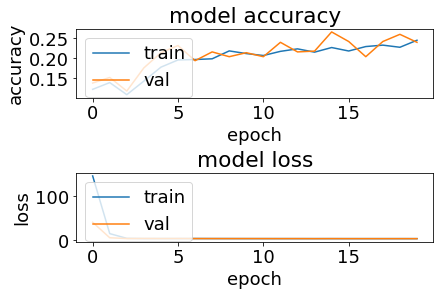

157/157 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.24      0.66      0.36       505
           1       0.45      0.12      0.18       460
           2       0.11      0.01      0.02       519
           3       0.24      0.10      0.14       486
           4       0.18      0.64      0.28       519
           5       0.12      0.01      0.01       488
           6       0.35      0.10      0.15       518
           7       0.28      0.43      0.34       486
           8       0.20      0.06      0.09       520
           9       0.35      0.25      0.29       498

    accuracy                           0.24      4999
   macro avg       0.25      0.24      0.19      4999
weighted avg       0.25      0.24      0.19      4999

[[332  12   2   4  34   1   2  65  23  30]
 [152  53   8  23  78   3   7  59  45  32]
 [111   6   6  15 299   4  10  49   5  14]
 [ 72   9  15  50 217   6  29  52   7  29]
 [ 57   1   2 

In [17]:
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.5)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
    #aici initializam start_time
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    #aci calculam cat o durat
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
#aci punem printul cu timpu de executie

# Section iii

## (a) Modify the CNN architecture

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)            

INFO:tensorflow:Assets written to: cifar3.model\assets


INFO:tensorflow:Assets written to: cifar3.model\assets


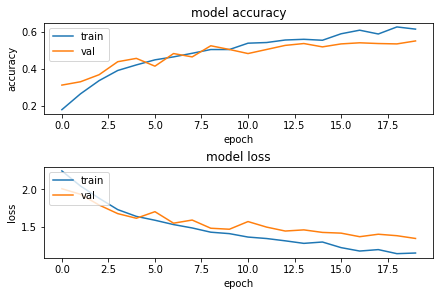

157/157 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       505
           1       0.80      0.78      0.79       460
           2       0.57      0.62      0.59       519
           3       0.58      0.56      0.57       486
           4       0.72      0.51      0.60       519
           5       0.60      0.72      0.66       488
           6       0.77      0.70      0.73       518
           7       0.73      0.74      0.74       486
           8       0.79      0.74      0.76       520
           9       0.69      0.85      0.76       498

    accuracy                           0.69      4999
   macro avg       0.70      0.69      0.69      4999
weighted avg       0.70      0.69      0.69      4999

[[355  14  36   6   6   3   2   5  47  31]
 [ 10 360   3   0   2   2   8   2  17  56]
 [ 23   4 321  38  32  34  25  23  11   8]
 [  7   4  29 274  15  79  31  18   5  24]
 [ 25   2  62

In [8]:
from keras.layers import MaxPooling2D

plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
execution_time = 0
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start_time = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	execution_time = time.time() - start_time
    #nu uita sa salvezi modelu cu alt nume
	model.save("cifar3.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
print("--- %s seconds ---" % execution_time)